In [3]:
from netCDF4 import Dataset
import numpy as np

In [43]:
nc = Dataset('data/sbmn_cappi_20140103_031208.nc','r')

Extracting and plotting point Data

In [25]:
nc.dimensions.keys()

odict_keys(['time', 'bounds', 'x0', 'y0', 'z0'])

In [30]:
#fh.variables.keys()
for i in fh.variables:
    print ([i,nc.variables[i].shape])

['time', (1,)]
['start_time', (1,)]
['stop_time', (1,)]
['time_bounds', (1, 2)]
['x0', (241,)]
['y0', (241,)]
['lat0', (241, 241)]
['lon0', (241, 241)]
['z0', (40,)]
['grid_mapping_0', ()]
['VEL', (1, 40, 241, 241)]
['DBZc', (1, 40, 241, 241)]
['range', (1, 40, 241, 241)]
['Coverage', (1, 40, 241, 241)]


In [33]:
fh.variables['x0'].units

'km'

In [36]:
lons = nc.variables['lon0'][:]
lats = nc.variables['lat0'][:]
dbz = nc.variables['DBZc'][:][0][0:240]

dbz_units = nc.variables['DBZc'].units

## Ploting georefeced data

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [38]:
lat_0 = lats.mean()
lon_0 = lons.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0,)

/home/mastercontrol/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


In [39]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon , lat = np.meshgrid(lons[0][:], lats[0][:])
xi, yi = m(lon, lat)

/home/mastercontrol/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
/home/mastercontrol/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


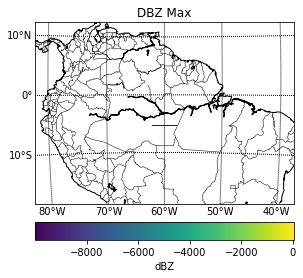

In [40]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(dbz.data[0]))

# # Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)


# # Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# # Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%", size='10%')
cbar.set_label(dbz_units)

# # Add Title
plt.title('DBZ Max')
plt.show()

In [59]:
dbz = nc.variables['DBZc'][:][0][0:240]
dados = dbz.data

In [42]:
count = 0
for i in dados:
    print(i)
    count = count + 1

[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]
[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]
[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]
[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [

In [76]:
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

In [77]:
xds = xr.open_dataset('data/sbmn_cappi_20140103_031208.nc')

In [82]:
xds.DBZc

<xarray.DataArray 'DBZc' (time: 1, z0: 40, y0: 241, x0: 241)>
[2323240 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2014-01-03T03:12:08
  * x0       (x0) float32 -240.0 -238.0 -236.0 -234.0 ... 236.0 238.0 240.0
  * y0       (y0) float32 -240.0 -238.0 -236.0 -234.0 ... 236.0 238.0 240.0
    lat0     (y0, x0) float32 ...
    lon0     (y0, x0) float32 ...
  * z0       (z0) float32 0.5 1.0 1.5 2.0 2.5 3.0 ... 18.0 18.5 19.0 19.5 20.0
Attributes:
    valid_min:      -21.54068
    valid_max:      49.67983
    standard_name:  DBZc
    long_name:      CZ
    units:          dBZ
    grid_mapping:   grid_mapping_0

In [194]:
x = xds.DBZc['x0'].data
y = xds.DBZc['y0'].data

dados = xds.DBZc[0][0].data

for i in range(40):
    matrizA =  (xds.DBZc[0][i].data)
    MatrizB =   (xds.DBZc[0][i].data)
    print (matrizA + MatrizB)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan